# Drill: Present the same data multiple ways

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy
%matplotlib inline

plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams.update({'font.size': 14})

In [3]:
yt_data= pd.read_csv('USvideos.csv')

In [4]:
yt_data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


### Choose one variable and plot that variable four different ways.

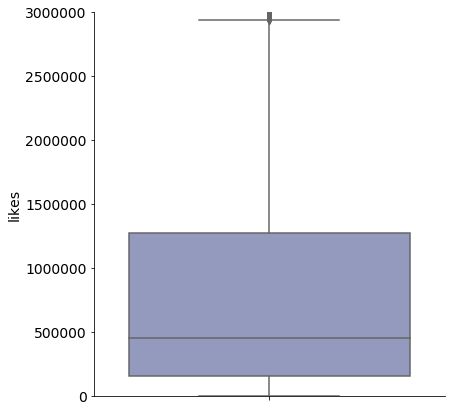

In [6]:
sns.factorplot(y= 'views', data = yt_data, kind = 'box', palette = 'BuPu', size = 6)
plt.ylim(0, 3000000)
plt.ylabel("likes")

plt.show()

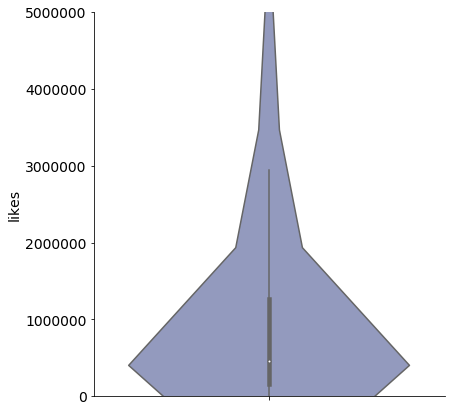

In [7]:
sns.factorplot(y= 'views', data = yt_data, kind = 'violin', palette = 'BuPu', size = 6)
plt.ylim(0, 5000000)
plt.ylabel("likes")

plt.show()

(0, 6000000)

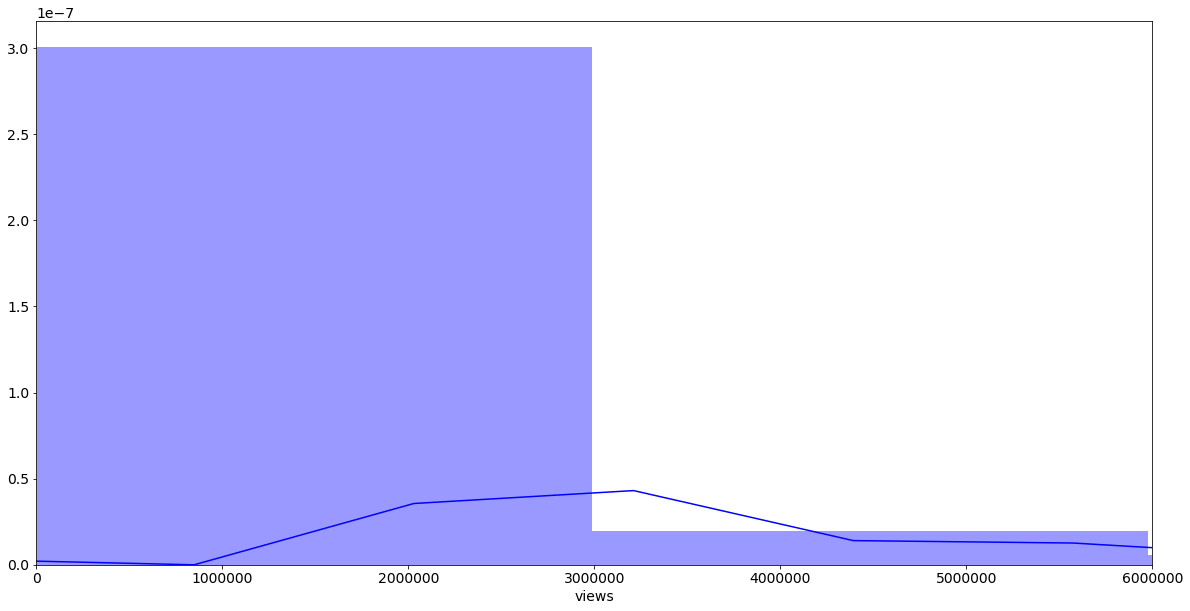

In [19]:
sns.distplot(x= yt_data.views, color = 'b')

plt.xlim(0, 6000000)

In [22]:
active = yt_data.channel_title.apply(value_counts())

NameError: name 'value_counts' is not defined

### Choose two continuous variables, and plot them three different ways.